In [3]:
print('what\'s up')


what's up


# Notebook Import

In [66]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

%matplotlib inline

# Constants

In [5]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'


SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
EASY_NOSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NOSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0

DATA_JSON_FILE = 'SpamData/01_Processing/email_text_data.json'

# Reading Files

In [6]:
stream = open(EXAMPLE_FILE, encoding= 'latin_1')
message = stream.read()
stream.close()
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [7]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [8]:
stream = open(EXAMPLE_FILE, encoding= 'latin_1')
is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line =='\n':
        is_body = True
stream.close()

email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

 1. A generator-function: is defined like a normal function, but whenever it needs to generate a value, it does so with the    yield keyword rather than return. If the body of a def contains yield, the function automatically becomes a generator function.

 2. Generator-Object : Generator functions return a generator object. Generator objects are used either by calling the next method on the generator object or using the generator object in a “for in” loop.
 
 3. Applications : Suppose we to create a stream of Fibonacci numbers, adopting the generator approach makes it trivial; we just have to call next(x) to get the next Fibonacci number without bothering about where or when the stream of numbers ends.
A more practical type of stream processing is handling large data files such as log files. Generators provide a space efficient method for such data processing as only parts of the file are handled at one given point in time. We can also use Iterators for these purposes, but Generator provides a quick way (We don’t need to write __next__ and __iter__ methods here).
 
 
 
 
 
 

In [9]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [10]:
for i in generate_squares(5):
    print(i, end='->')

0->1->4->9->16->

# Email body extraction

In [11]:
def email_body_generator(path):
    for root,dirnames, filenames in walk(path): #(os library)walk generates the dir, by walking the tree from top to bottom and yields a tuple (di_path,dirnames,filenames)
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding= 'latin_1')
            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line =='\n':
                    is_body = True
            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body   # yield gives output everytime when loop is completed

            

In [12]:
def df_from_directory(path, classification):
    rows=[]
    row_names =[]
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'CATEGORY': classification, 'MESSAGES': email_body })
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index = row_names)

    

In [13]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

,CATEGORY,MESSAGES
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [14]:
spam_emails.shape

(1002, 2)

In [15]:
ham_emails = df_from_directory(EASY_NOSPAM_1_PATH, HAM_CAT)
ham_emails = spam_emails.append(df_from_directory(EASY_NOSPAM_2_PATH, HAM_CAT))
ham_emails.head()


,CATEGORY,MESSAGES
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [16]:
ham_emails.shape

(2402, 2)

In [17]:
data =pd.concat([spam_emails, ham_emails], join = 'outer')
print('shape of entire dataframe is', data.shape)
data.head()

shape of entire dataframe is (3404, 2)


,CATEGORY,MESSAGES
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [18]:
data.tail()

,CATEGORY,MESSAGES
01396.61983fbe6ec43f55fd44e30fce24ffa6,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,0,"> >-- be careful when using this one.) Also, t..."
01398.169b51731fe569f42169ae8f948ec676,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ..."
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co..."
01400.f897f0931e461e7b2e964d28e927c35e,0,"Hi there,\n\n\n\nNow this is probably of no us..."


# Data Cleaning : Checking for missing values

In [19]:
#check if any message body are equal to null
data['MESSAGES'].isnull().values.any().sum()

0

In [20]:
#check if there are empty emails ( String length is zero)
any(data.MESSAGES.str.len() == 0)

True

In [21]:
(data.MESSAGES.str.len() == 0).sum()  #sums up any true values in the X entries

4

# Locate empty emails

In [22]:
data[data.MESSAGES.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds', 'cmds'], dtype='object')

In [23]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

# Remove system file entries

In [24]:
data.drop(['cmds'], inplace = True)

In [25]:
data.shape

(3400, 2)

# Add document IDs to track emails in dataset

In [26]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [27]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    3395
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    3396
01398.169b51731fe569f42169ae8f948ec676    3397
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    3398
01400.f897f0931e461e7b2e964d28e927c35e    3399
Name: DOC_ID, Length: 3400, dtype: int64

In [28]:
data['FILE_NAME'] = data.index
data = data.set_index('DOC_ID')
data.head()


,CATEGORY,MESSAGES,FILE_NAME
DOC_ID,,,
0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


In [29]:
data.tail()

,CATEGORY,MESSAGES,FILE_NAME
DOC_ID,,,
3395,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...,01396.61983fbe6ec43f55fd44e30fce24ffa6
3396,0,"> >-- be careful when using this one.) Also, t...",01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
3397,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",01398.169b51731fe569f42169ae8f948ec676
3398,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
3399,0,"Hi there,\n\n\n\nNow this is probably of no us...",01400.f897f0931e461e7b2e964d28e927c35e


# Save to file using pandas

In [ ]:
data.o_json(DATA_JSON_FILE)

# Number of spam messages visualised (Pie Charts)

In [31]:
data.CATEGORY.value_counts()

1    2000
0    1400
Name: CATEGORY, dtype: int64

In [45]:
amount_of_spam = data.CATEGORY.value_counts()[0]
amount_of_ham = data.CATEGORY.value_counts()[1]

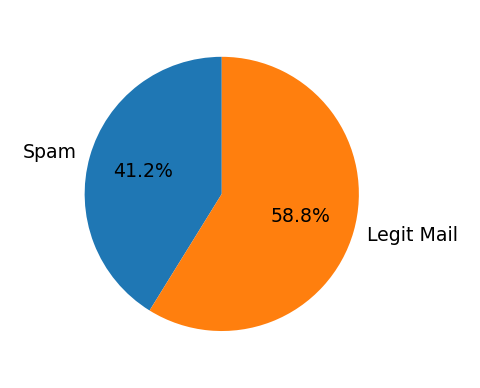

In [48]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

plt.figure(figsize = (2,2), dpi = 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize': 6}, startangle = 90, autopct = '%1.1f%%' )
plt.show()

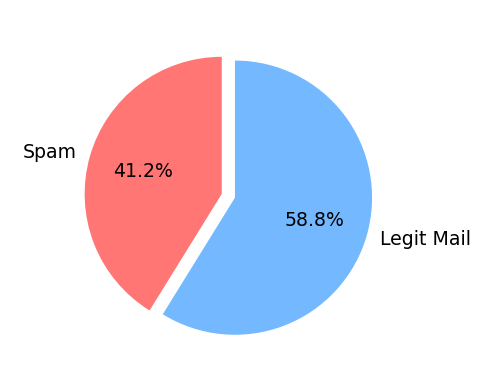

In [51]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']
plt.figure(figsize = (2,2), dpi = 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize': 6}, startangle = 90, autopct = '%1.1f%%', 
        colors = custom_colors, explode = [0, 0.1] )
plt.show()

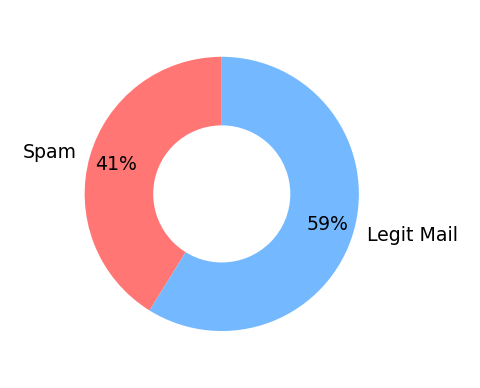

In [57]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#74b9ff']
plt.figure(figsize = (2,2), dpi = 227)
plt.pie(sizes, labels = category_names, textprops = {'fontsize': 6}, startangle = 90, autopct = '%1.0f%%', 
        colors = custom_colors, pctdistance =0.8 )

#drawing a circle
centre_circle = plt.Circle((0,0), radius =0.5, fc = 'white')
plt.gca().add_artist(centre_circle)
plt.show()

# Natural langusge Processing

### Text Pre-Processing

In [65]:
# converting to lower case
msg = 'All work and no play makes Jack a dull boy.'
msg. lower()

'all work and no play makes jack a dull boy.'

## Download NLTK resourses (Tokensizer & Stopwords)